In [1]:
import numpy as np

In [2]:
train = np.loadtxt('in.dta')
test  = np.loadtxt('out.dta')

In [3]:
Xtrain = train[:25, :2]
ytrain = train[:25, [2]]

Xvalidation = train[25:, :2]
yvalidation = train[25:, [2]]

Xtest = test[:, :2]
ytest = test[:, [2]]

In [4]:
Ztrain = np.hstack(
              (np.ones((len(Xtrain), 1)), 
               Xtrain, 
               Xtrain[:, [0]]**2, 
               Xtrain[:, [1]]**2, 
               Xtrain[:, [0]] * Xtrain[:, [1]], 
               np.abs(Xtrain[:, [0]] - Xtrain[:, [1]]), 
               np.abs(Xtrain[:, [0]] + Xtrain[:, [1]])
              )
          )


Zvalidation = np.hstack(
                  (np.ones((len(Xvalidation), 1)), 
                   Xvalidation, 
                   Xvalidation[:, [0]]**2, 
                   Xvalidation[:, [1]]**2, 
                   Xvalidation[:, [0]] * Xvalidation[:, [1]], 
                   np.abs(Xvalidation[:, [0]] - Xvalidation[:, [1]]), 
                   np.abs(Xvalidation[:, [0]] + Xvalidation[:, [1]])
                  )
              )

Ztest = np.hstack(
              (np.ones((len(Xtest), 1)), 
               Xtest, 
               Xtest[:, [0]]**2, 
               Xtest[:, [1]]**2, 
               Xtest[:, [0]] * Xtest[:, [1]], 
               np.abs(Xtest[:, [0]] - Xtest[:, [1]]), 
               np.abs(Xtest[:, [0]] + Xtest[:, [1]])
              )
    )

In [5]:
def regularization(k=-np.inf, Ztrain=Ztrain, Ztest=Zvalidation, ytrain=ytrain, ytest=yvalidation):
    Ztrain = Ztrain[:, :(k+1)]
    Ztest  = Ztest[:, :(k+1)]
    wreg = np.dot(np.dot(np.linalg.inv(np.dot(Ztrain.T, Ztrain)), Ztrain.T), 
                  ytrain)
    
    yhat_train = np.where(np.dot(Ztrain, wreg) > 0, 1, -1)
    yhat_test  = np.where(np.dot(Ztest,  wreg) > 0, 1, -1)
    E_in  = 1 - np.mean(yhat_train == ytrain)
    E_out = 1 - np.mean(yhat_test  == ytest)
    return(E_out)

In [6]:
ks_and_E_outs = []
for k in range(3, 8):
    ks_and_E_outs.append((regularization(k), k))
print("The k with the smallest Eout is {}".format(sorted(ks_and_E_outs)[0][1]))

The k with the smallest Eout is 6


In [7]:
ks_and_E_outs = []
for k in range(3, 8):
    ks_and_E_outs.append((regularization(k, Ztest=Ztest, ytest=ytest), k))
print("The k with the smallest Eout is {}".format(sorted(ks_and_E_outs)[0][1]))

The k with the smallest Eout is 7


In [8]:
ks_and_E_outs = []
for k in range(3, 8):
    ks_and_E_outs.append((regularization(k, 
                                         Ztrain=Zvalidation, 
                                         Ztest=Ztrain, 
                                         ytrain= yvalidation, 
                                         ytest=ytrain), k))
print("The k with the smallest Eout is {}".format(sorted(ks_and_E_outs)[0][1]))

The k with the smallest Eout is 6


In [9]:
Eout1 = regularization(6, 
                         Ztrain=Ztrain, 
                         Ztest=Ztest, 
                         ytrain= ytrain, 
                         ytest=ytest)

Eout3 = regularization(6, 
                         Ztrain=Zvalidation, 
                         Ztest=Ztest, 
                         ytrain= yvalidation, 
                         ytest=ytest)

print("Eouts for the models of Problem 1 and 3 are ({},{})".format(round(Eout1, 1), round(Eout3, 1)))

Eouts for the models of Problem 1 and 3 are (0.1,0.2)


# When $e_1$ is the minimum, then $e_2$ can vary from $1$ to $e_1$ whereas $e_1$ can be anything and vice-versa for when $e_2$ is the minimum

# $\mathbb E\bigl[ min(e_1, e_2)\bigr] = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} min(e_1, e_2)p(e_1, e_2)d e_1 d e_2 $

# $\mathbb E\bigl[ min(e_1, e_2)\bigr] = \int_0^1\int_0^1 min(e_1, e_2)d e_1 d e_2 $ 
# $\mathbb E\bigl[ min(e_1, e_2)\bigr] = \int_0^1 e_1(1-e_1)d e_1 + \int_0^1 e_2(1-e_2)d e_2 $ 
# $\mathbb E\bigl[ min(e_1, e_2)\bigr] = 2\int_0^1 e(1-e)d e $ 
# $\mathbb E\bigl[ min(e_1, e_2)\bigr] = e^2-\frac{2}{3}e^3 \bigg|_0^1 $ 
# $\mathbb E\bigl[ min(e_1, e_2)\bigr] = \frac{1}{3}$ 

# $\frac{1}{3}$ is closest 0.4

# The answer is [d]


In [10]:
from itertools import combinations

In [11]:
def locv_constant(X, y):
    E_ins = np.zeros(len(X))
    for i, train_idx in enumerate(combinations(range(len(X)), len(X)-1)):
        
#         Xtrain  = X[np.array(train_idx)]
#         Xtest   = X[np.array(tuple(set(range(len(X))) - set(train_idx)))]
        yhat_test  = np.mean(y[np.array(train_idx)])
        ytest      = y[np.array(tuple(set(range(len(X))) - set(train_idx)))]

#         print('ytest', ytest)
        E_in  = np.mean((yhat_test - ytest)**2)
        E_ins[i] = E_in
    return(np.mean(E_ins))

In [12]:
def locv_linear(X, y):
    E_ins = np.zeros(len(X))
    for i, train_idx in enumerate(combinations(range(len(X)), len(X)-1)):
        
        Xtrain  = X[np.array(train_idx)]
        Xtest   = X[np.array(tuple(set(range(len(X))) - set(train_idx)))]
        ytrain  = y[np.array(train_idx)]
        ytest   = y[np.array(tuple(set(range(len(X))) - set(train_idx)))]

        wreg = np.dot(np.dot(np.linalg.inv(np.dot(Xtrain.T, Xtrain)), Xtrain.T), ytrain)
        yhat_test = np.dot(Xtest, wreg)

        E_in  = np.mean((yhat_test - ytest)**2)
        E_ins[i] = E_in
    return(np.mean(E_ins))

In [13]:
size = (3, 1)
rhos = np.array((np.sqrt(np.sqrt(3)+4), np.sqrt(np.sqrt(3)-1), np.sqrt(9+4*np.sqrt(6)), np.sqrt(9-np.sqrt(6))))
rho_labels = ['√(√3 + 4)', '√(√3 - 1)', '√(9 + 4√6)', '√(9 - √6)']

for i, rho in enumerate(rhos):
    X = np.hstack((np.ones(size), np.reshape(np.array((-1, rho, 1)), size)))
    y = np.reshape(np.array((0, 1, 0)), size)
    print("rho = {}, squared error constant = {}, squared error linear = {}".format(rho_labels[i], 
                                                                                    round(locv_constant(X, y), 2), 
                                                                                    round(locv_linear(X, y), 2)))

rho = √(√3 + 4), squared error constant = 0.5, squared error linear = 1.14
rho = √(√3 - 1), squared error constant = 0.5, squared error linear = 64.66
rho = √(9 + 4√6), squared error constant = 0.5, squared error linear = 0.5
rho = √(9 - √6), squared error constant = 0.5, squared error linear = 0.99


# Answer is [c] $\sqrt{9 + \sqrt{6}}$

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

# Let's make our random $f(x)$ line function!

In [15]:
def make_weights_for_fx():
    """Creates the d=2 weight vector for f(x) from 
       the random two points selected.
       
       Returns:
       A tuple 2-items tuple representing (intercept, slope)
    """

    point1 = np.random.uniform(-1, 1, (1, 2))[0]
    point2 = np.random.uniform(-1, 1, (1, 2))[0] 
    w1 = (point2 - point1)[1] / (point2 - point1)[0]
    w0 = point1[1] - w1 * point1[0]
    w_fx = np.array((w0, w1))
           
    return w_fx

# Let's create some helper functions to convert $\mathbf w^T$ from $\mathbb R^2 \to \mathbb R^3$ and $\mathbb R^3 \to \mathbb R^2$ this will help with graphing and other functions

In [16]:
def w_3dim_to_2dim(w_3dim):
    denom = w_3dim[2]
    if denom == 0:
        denom = 1e-2
    return -(w_3dim/denom)[:2]

# w_3dim_to_2dim = lambda w_3dim:  -(w_3dim/w_3dim[2])[:2]


w_2dim_to_3dim = lambda w_2dim:  np.hstack((-w_2dim, 1))

# Now let's make a function that creates some random points and labels!

In [17]:
def create_random_points_and_labels(N, weights_fx):
    """Creates N random points in the space of  [−1, 1] × [−1, 1]
       and them labels them based on what side of of the line they
       land on based on weights_fx.
       
    Args:
    
        N: Number of random points
        weights_fx:  tuple representing (intercept, slope) of f(x)
    
    Returns:
    
        A tuple of the following items:
            X: an N X D array representing the coordinates of of the points
            Y: an N X 1 array representing +1 or -1 depending on which side of
               the points land in relation to fx 
    """
    
    X = np.hstack((np.ones((N, 1)), np.random.uniform(-1,1,(N,2))))
    
    w_fx = w_2dim_to_3dim (weights_fx)
    score = np.dot(X, w_fx)
    
    Y = np.where(score > 0 , 1, -1)
    Y = np.expand_dims(Y, 1) # need to change array into vector for calcs to work out!
    
    return(X, Y)

# OK now let's make a PLA function based on our code.  This function will accept $\mathcal X$, $y$ and  will return  $g_{\tiny PLA}(x)$.

In [18]:
def get_w_PLA(X, y):
    """Creates the d=2 weight vector for gx based on using PLA.
       
    Args:
       
        X: an N X D array representing the coordinates of of the points
        y: an N X 1 array representing +1 or -1
       
       Returns:
           
           A tuple of the following items:
            w0_g: represents intercept of g(x)
            w1_g: represents slope of g(x)
            n: the number of iterations needed for convergence
               we will use that to answer the hw questions
    """
    
    converged = False
    n = 0
    w_g = np.zeros(3) # 0 weight vector
                      # for d=2 we need to add extra dimension of for intercept
                      # e.g. (1, x1, x2)
    
    while not converged:
        converged = True
        
        # while the homework asks to choose a random misclassified point
        # a for-loop essentially does the same job and doesn't affect 
        # the performance of the algorithm. In other texts the algorithm
        # is stated as a for-loop
        
        for i in range(len(X)):
            if y[i]*np.dot(w_g, X[i]) <= 0: # misclassified point?
                n += 1 
                w_g += y[i]*X[i]
                converged = False
                
    return w_3dim_to_2dim(w_g)

# OK now let's make a function based on our code.  This function will accept $\mathcal X$, $y$ and  will return  $g_{svm}(x)$ and the number of support vectors.

In [19]:
from cvxopt import matrix, solvers
solvers.options['show_progress'] = False

def get_w_svm(X, y):
    X_2dim = X[:, 1:]
    y = y.astype(np.double)
    dim = y.shape[0]
    
    X_prime = X_2dim * y
    P = np.dot(X_prime, X_prime.T)
    P += np.diag(np.repeat(1e-14, dim))
    G = -np.identity(dim)
    h = np.zeros(dim)
    q = -np.ones(dim)
    b = np.zeros(dim)
    A = np.tile(y.T, (dim, 1))
    
    P = matrix(P)
    q = matrix(q)
    G = matrix(G)
    h = matrix(h)
    A = matrix(y.T, (1,dim))
    b = matrix(np.zeros(1))
    
    sol=solvers.qp(P=P, q=q, G=G, h=h, A=A, b=b)
    
    alpha = np.array(sol['x'])
    alpha_zeroed = np.where(alpha < 0.5, 0, alpha)
    num_support_vectors = len(np.where(alpha_zeroed)[0])
                              
    w = np.dot(alpha_zeroed.T, X_prime)[0]
    alpha_idx = np.argmax(alpha_zeroed)
 
    w0 = (1/y[alpha_idx] - np.dot(w, X_2dim[alpha_idx]))[0]
 
   
    w_SVM = w_3dim_to_2dim(np.hstack([w0, w]))
    

    return (w_SVM, num_support_vectors)

# And make a helper plot function to see if our functions are working correctly.

In [20]:
def plot_points_and_lines(weights_fx, weights_PLA, weights_SVM, X, y):
    """Creates the plot of f(x) and g(x) lines along with labeled points
    
       Args:
        weights_fx:  tuple representing (intercept, slope) of f(x)
        weights_gx:  tuple representing (intercept, slope) of g(x)
        X: an N X D array representing the coordinates of of the points
        y: an N X 1 array representing +1 or -1
        
    """
    
    line = np.linspace(-1, 1, 1001) # points from 0-1000
    
    plt.plot(line, line * weights_fx[1]  + weights_fx[0],  label="$f(x)$",              color='blue')  # makes f(x) line
    plt.plot(line, line * weights_SVM[1] + weights_SVM[0], label="$g_{SVM}(x)$",color='green') # makes SVM line
    plt.plot(line, line * weights_PLA[1] + weights_PLA[0], label="$g_{PLA}(x)$",color='red'  ) # makes PLA line

    
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)
    
    plt.scatter(X[:, 1][y.ravel()==1],  X[:, 2][y.ravel()== 1], marker="+", c=("r"), label="+")
    plt.scatter(X[:, 1][y.ravel()==-1], X[:, 2][y.ravel()==-1], marker="_", c=("b"), label="-")# colored based on Y = +1 or -1
    plt.legend(loc="best")

# Now we need to make a grid to get the area below the line!

In [21]:
def make_grid(num_points = 5001):
    """Creates a grid of points and in the space of [−1, 1] × [−1, 1]
       We will use this to get the area of the negative regions of f(x) and g(x)
    
       Args:
       num_points: represents the refinement of the grid
                   more points ->  more precise area calculation
                   
       returns: N X 2 array representing the space of the graph
    """
    
    line = np.linspace(-1, 1, num_points)
    grid = np.zeros((num_points, num_points, 2))
    
    for i in np.arange(num_points):
        for j in np.arange(num_points):
            grid[i,j] = np.array((line[i], line[j]))
    
    return grid.reshape(-1,2)

# Now we use that grid to calculate the area under $f(x)$ and $g(x)$
# We then take the difference!

In [22]:
def get_disagreement(weights_fx, weights_gx, grid):
    """ Calculates P[f(x) != g(x)] by taking the absolute difference
        of the areas of the negative region (doesn't matter which region you take)
        
        Args:         
        weights_fx:  tuple representing (intercept, slope) of f(x)
        weights_gx:  tuple representing (intercept, slope) of g(x)
        grid: N X 2 array representing the space of the graph

        returns: number between 0 and 1 representing probability 
        """
    
    total_points = grid.shape[0]
    
    area_fx = (((grid[:, 1] - grid[:, 0] * weights_fx[1] - weights_fx[0]) <= 0) # sum of points in negative
               .sum() / total_points)                                           # region divided by total points
    
    area_gx = (((grid[:, 1] - grid[:, 0] * weights_gx[1] - weights_gx[0]) <= 0)
               .sum() / total_points)
    
    return abs(area_fx - area_gx) 

In [23]:
grid = make_grid()

In [24]:
w_fx = make_weights_for_fx()
X, y = create_random_points_and_labels(100, w_fx)

In [25]:
w_PLA = get_w_PLA(X, y)
print(w_PLA)

[ 0.19327894 -0.43349855]


In [26]:
w_SVM = get_w_svm(X, y)[0]
num_support_vectors = get_w_svm(X, y)[1]

print(w_SVM)
print(num_support_vectors)

[ 0.17005069 -0.45715106]
3


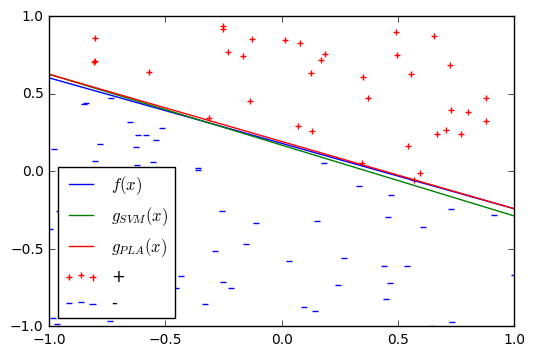

In [27]:
plot_points_and_lines(w_fx, w_PLA, w_SVM, X, y)

In [28]:
get_disagreement(w_fx, w_SVM, grid)

0.0057148738218762984

In [29]:
get_disagreement(w_fx, w_PLA, grid)

0.0058970009637344667

# Improvement is defined as $P[f(x) \neq g_{\tiny SVM}(x)] \lt
                                            P[f(x) \neq g_{\tiny PLA}(x)]$

In [30]:
error_SVM = get_disagreement(w_fx, w_SVM, grid)
error_PLA = get_disagreement(w_fx, w_PLA, grid)
improvmement = bool(error_SVM < error_PLA)
print("g_SVM is better than g_PLA is {}".format(improvmement))

g_SVM is better than g_PLA is True


# Now we create a function that combines all the previous functions
# And runs them multiple times to get an average disagreement.

In [31]:
def experiment(N=10, trials = 1000):
    """ Calculates SVM algorithm multiple times and gets
        the average of:
            1) the number of iterations needed for convergence
            2) Average P[f(x) != g(x)]

        args: 
        N: number of data points
        trials: number of trials that are averaged 
        """
    
    SVM_improvements             = np.zeros(trials)
    num_support_vector_list      = np.zeros(trials)
    
    for trial in range(trials):
        w_fx = make_weights_for_fx()
        X, y = create_random_points_and_labels(N, w_fx)[:2]
        
        get_svm_values = get_w_svm(X, y)
        w_SVM = get_svm_values[0]
        num_support_vectors = get_svm_values[1]
        
        w_PLA = get_w_PLA(X, y)
        
        SVM_error = get_disagreement(w_fx, w_SVM, grid)
        PLA_error = get_disagreement(w_fx, w_PLA, grid)
        is_improved = SVM_error < PLA_error
        
        SVM_improvements[trial] = is_improved
        num_support_vector_list[trial] = num_support_vectors
    
    
    avg_improvement     = np.mean(SVM_improvements)
    avg_support_vectors = np.mean(num_support_vector_list)
        
    return (avg_improvement, avg_support_vectors)

In [32]:
avg_improvement_10 = experiment(N=10, trials=1000)[0]

print("g(x)SVM is better than g(x)PLA {}% of the time".format(int(avg_improvement_10 * 100)))

g(x)SVM is better than g(x)PLA 60% of the time


In [33]:
avg_improvment_100, avg_num_support_vectors = experiment(N=100, trials = 1000)

In [34]:
print("g(x)SVM is better than g(x)PLA {}% of the time".format(round(avg_improvment_100 * 100,2)))
print("The average number of support vectors from SVM is {}".format(round(avg_num_support_vectors)))

g(x)SVM is better than g(x)PLA 62.2% of the time
The average number of support vectors from SVM is 3.0
